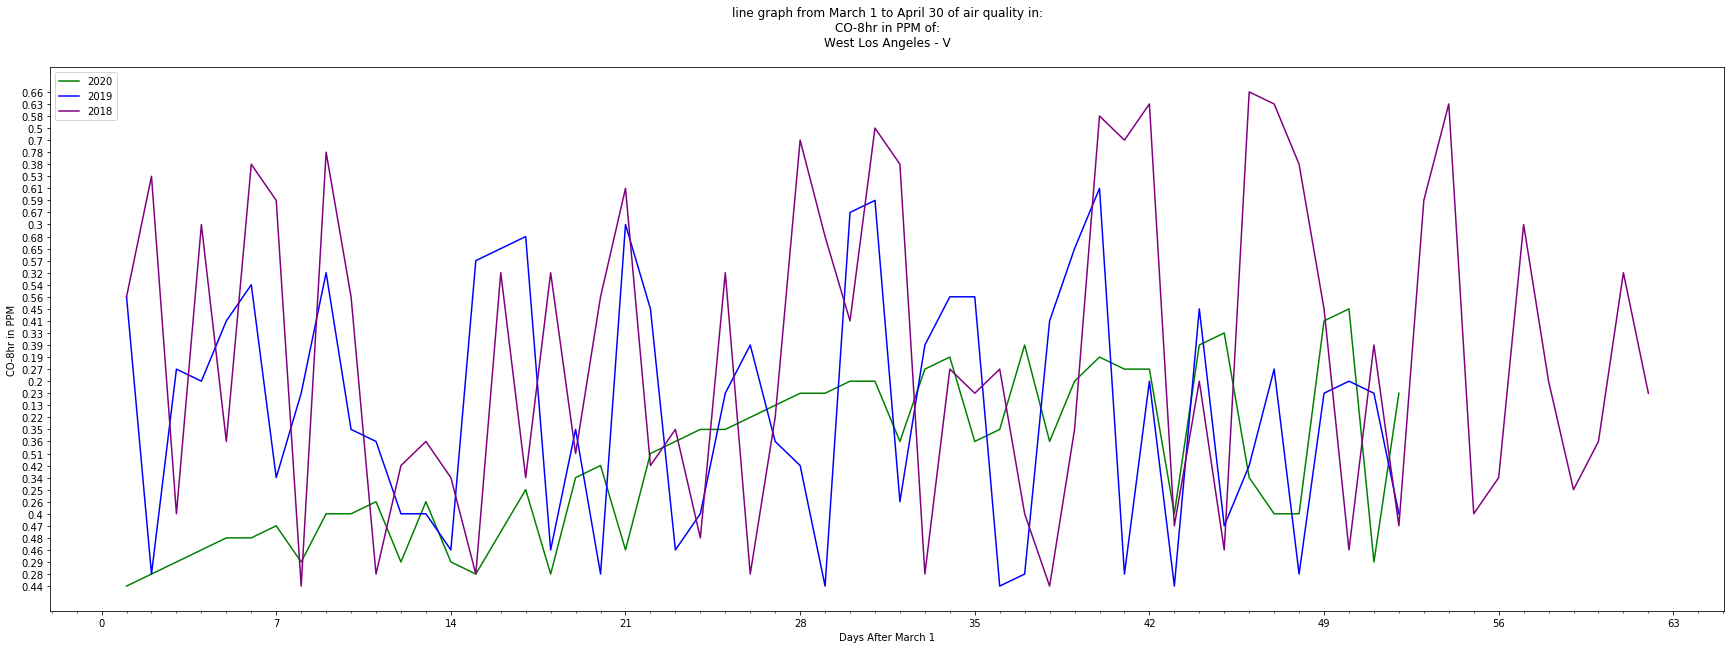

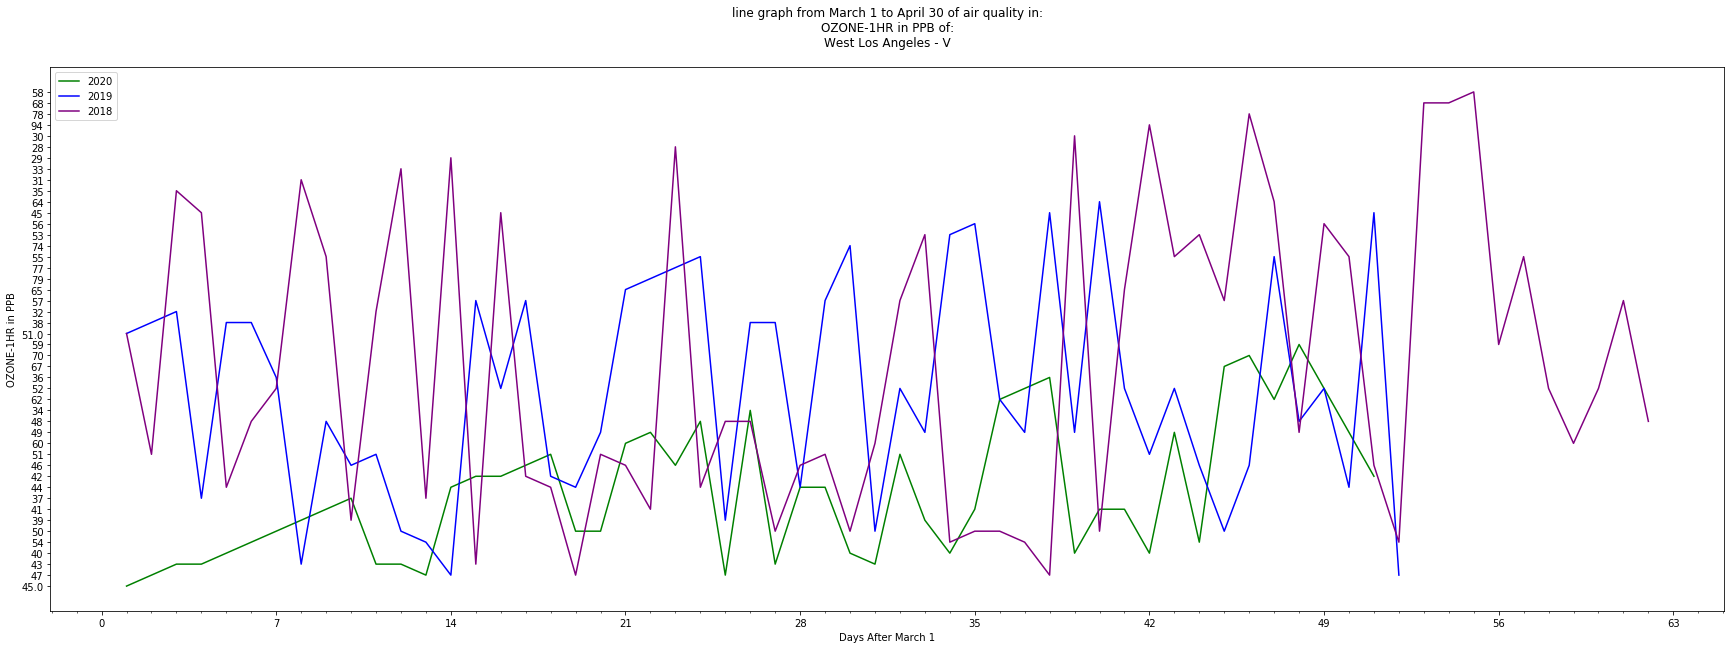

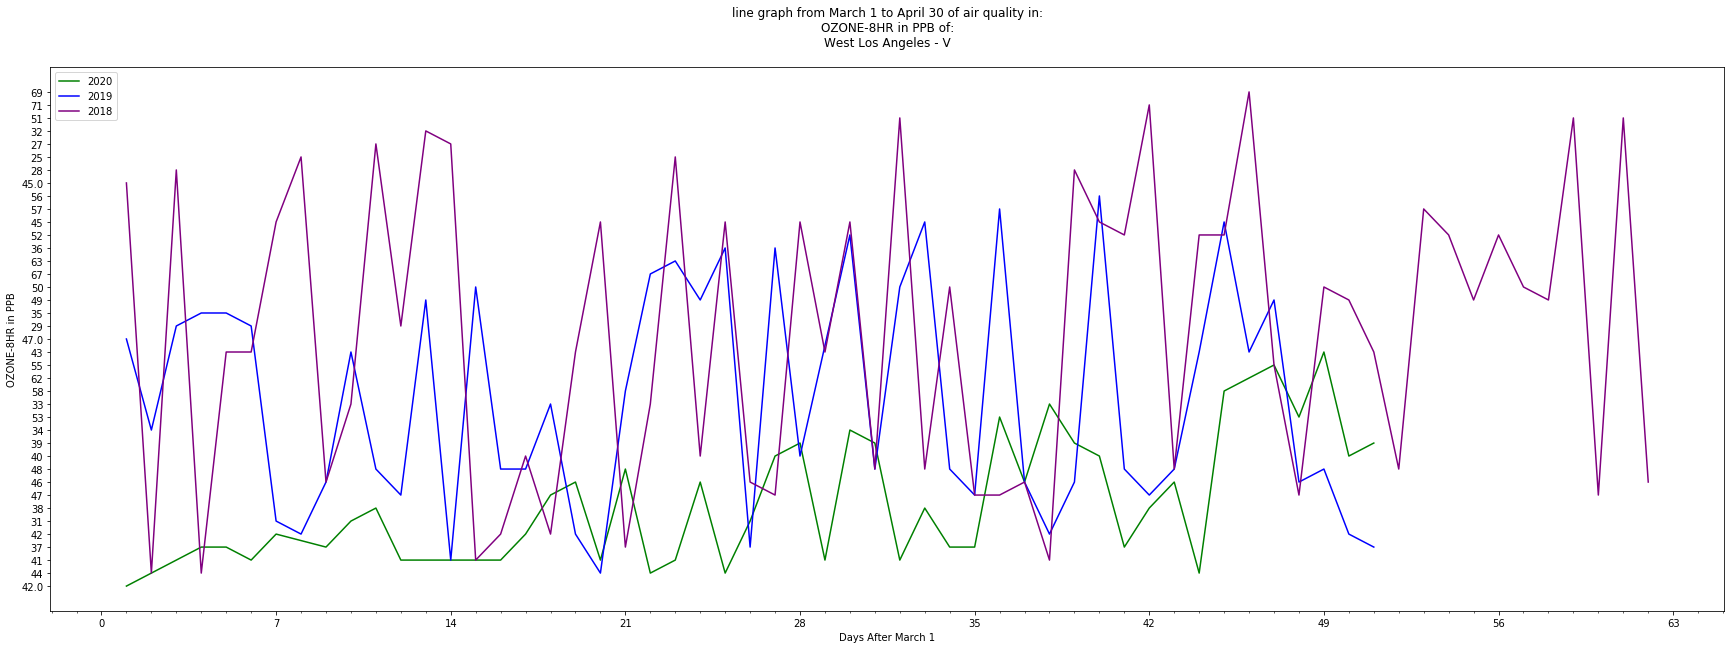

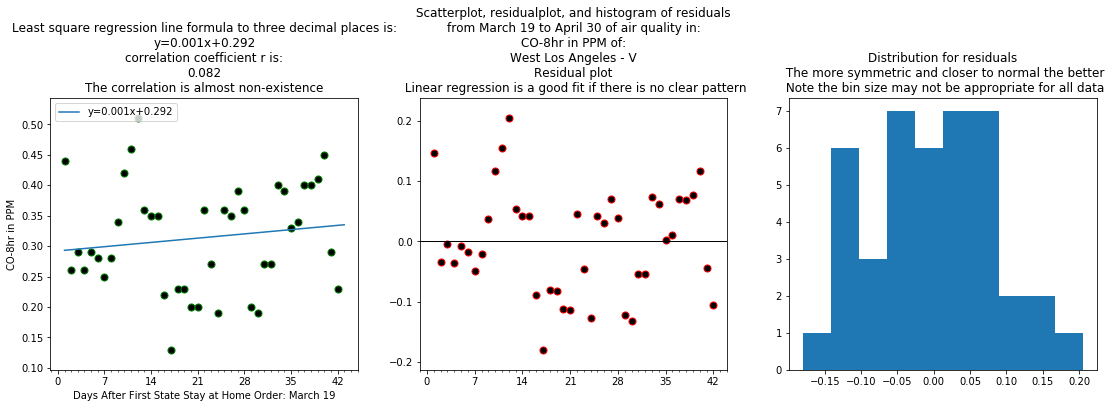

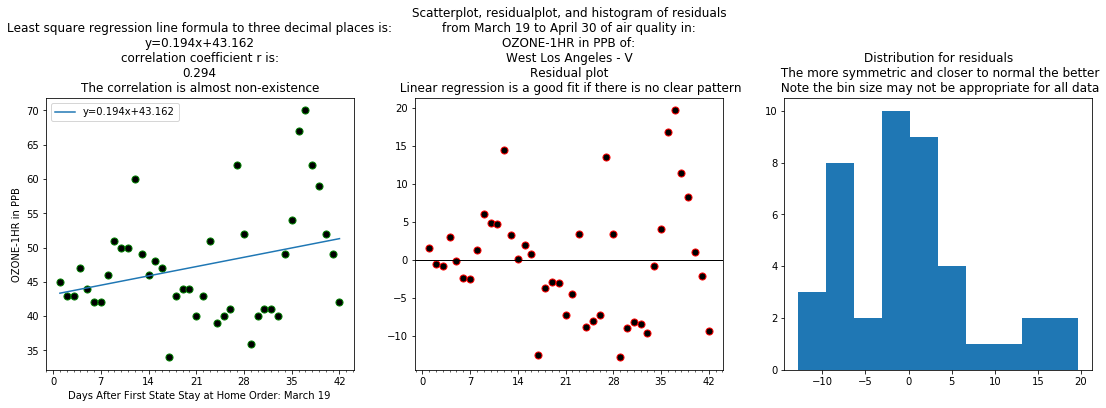

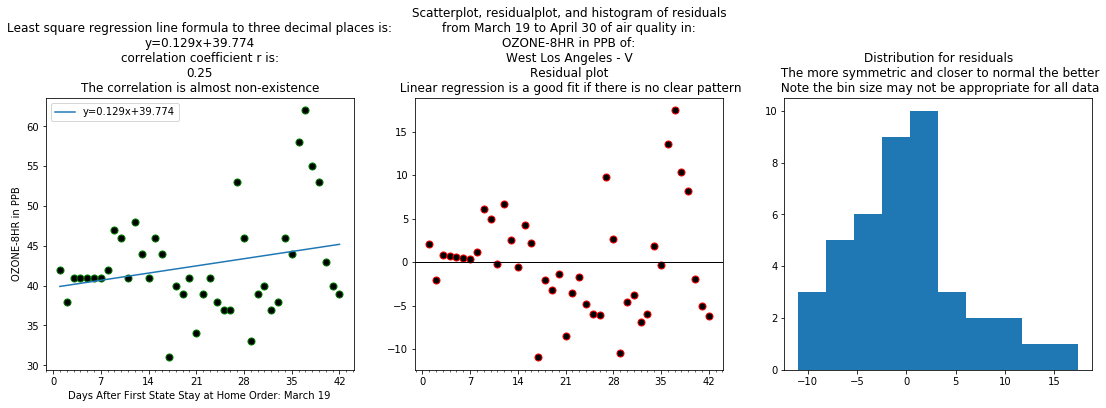

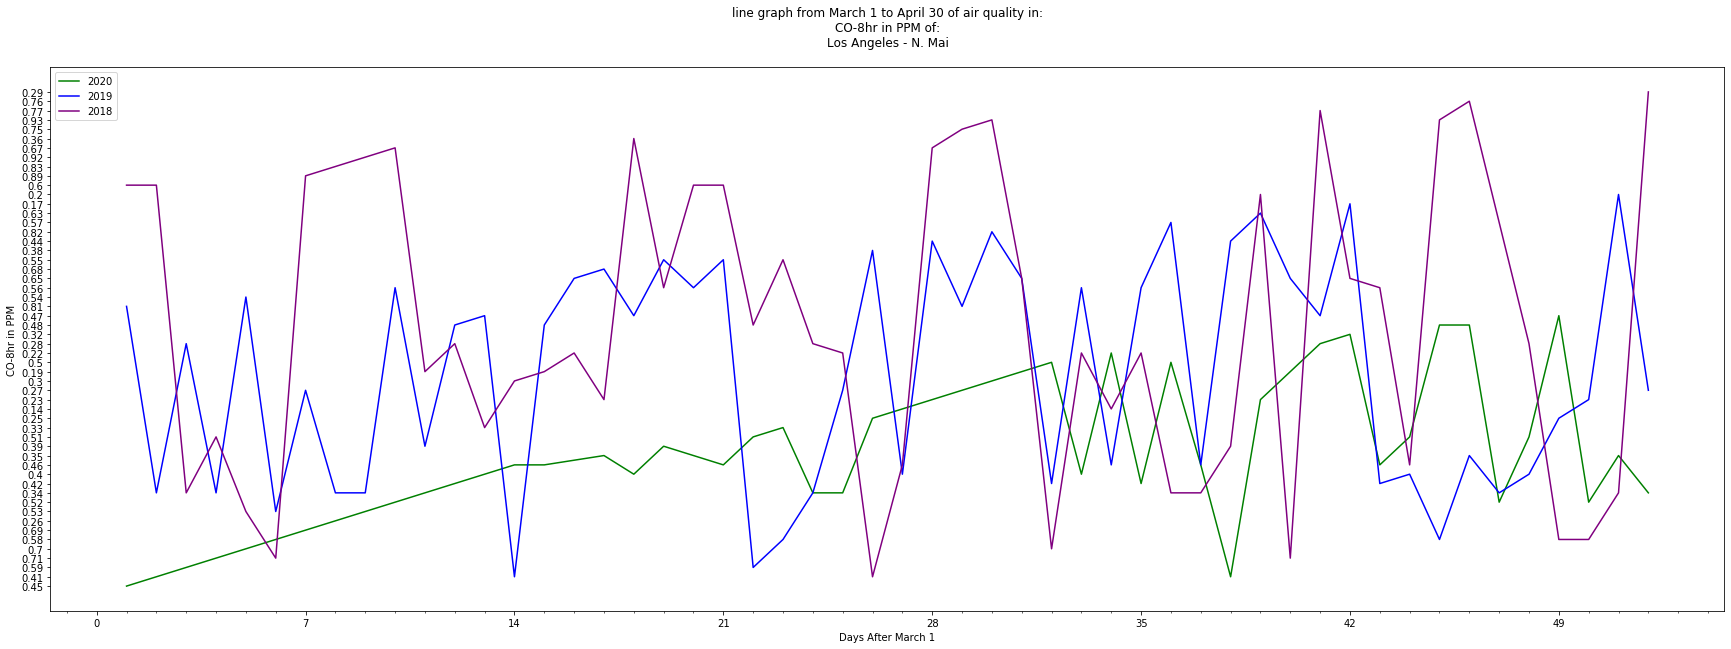

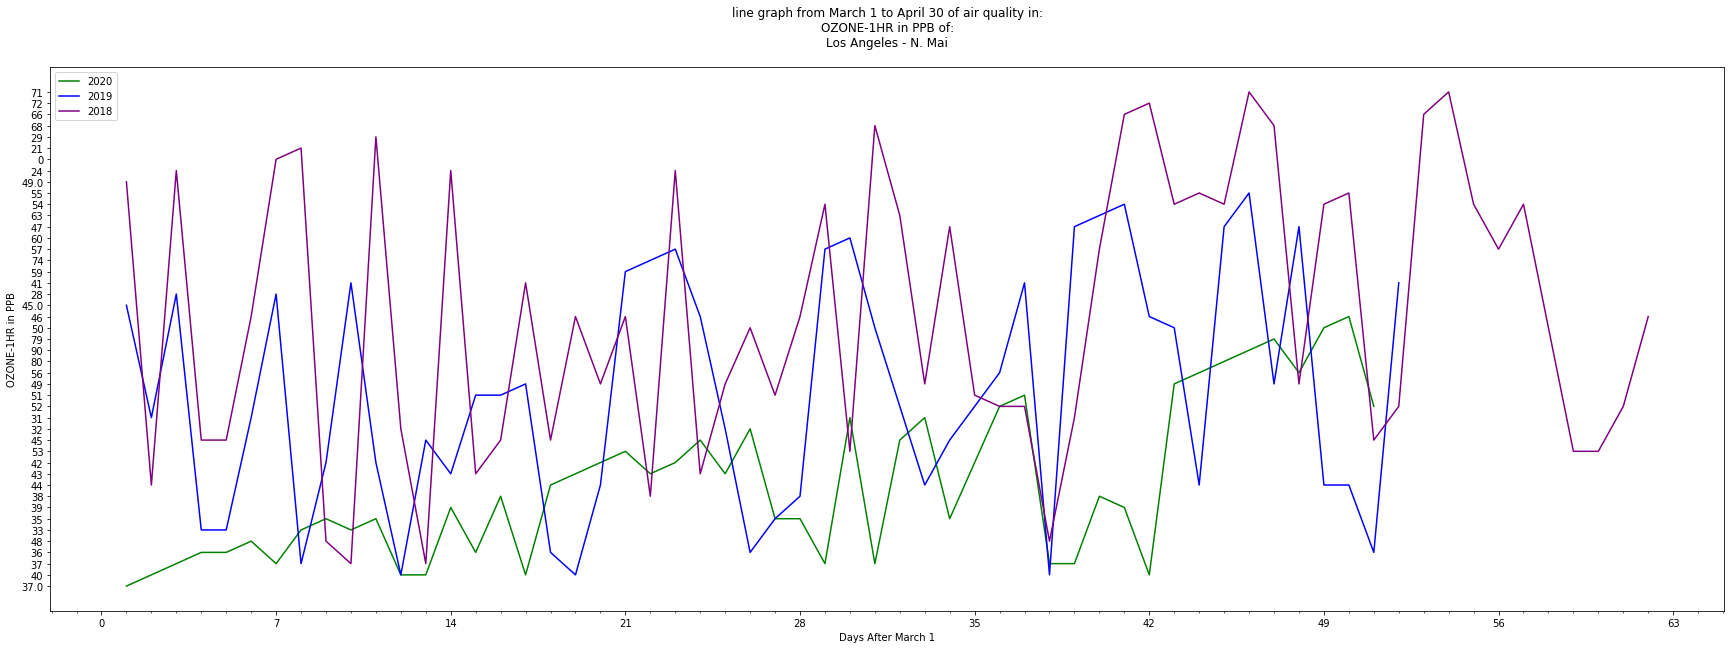

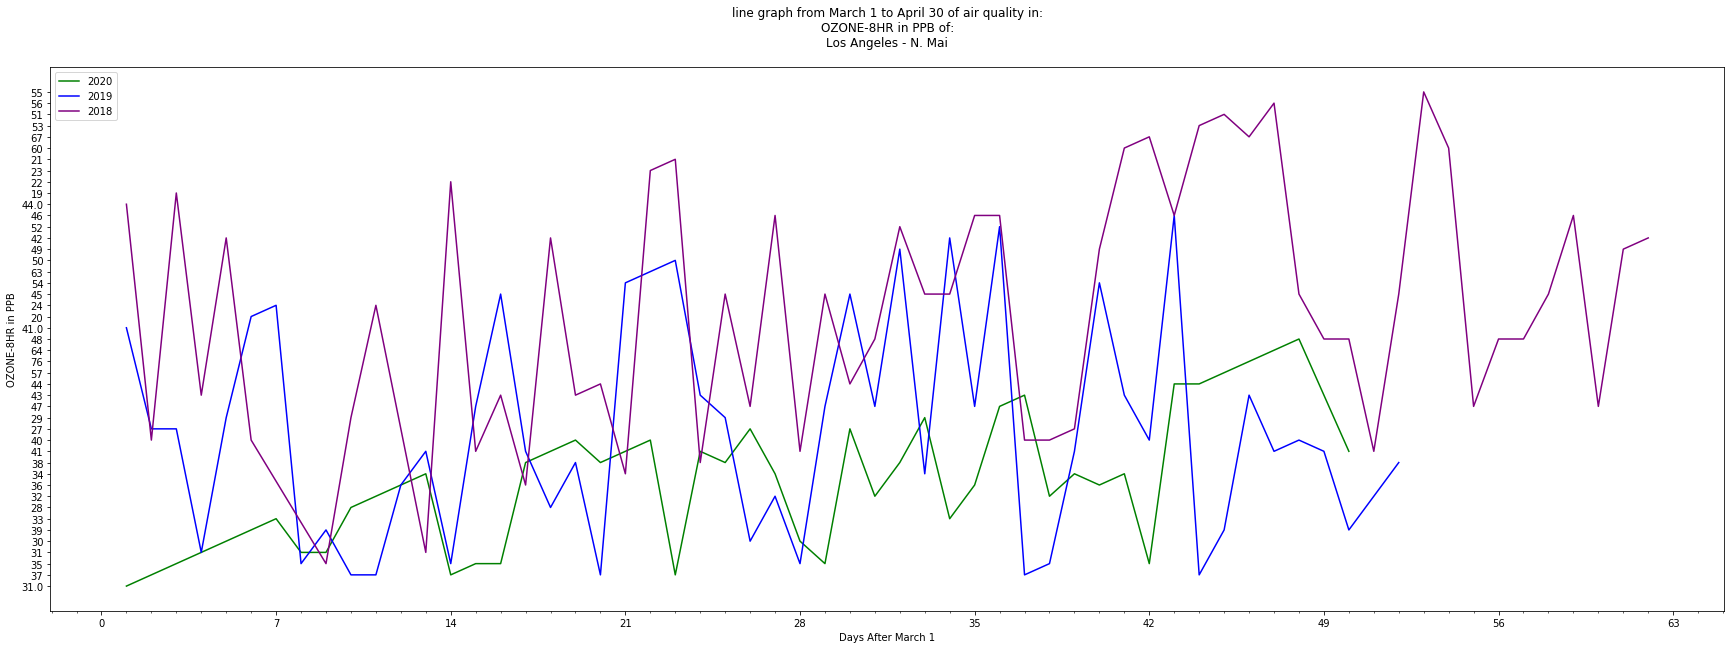

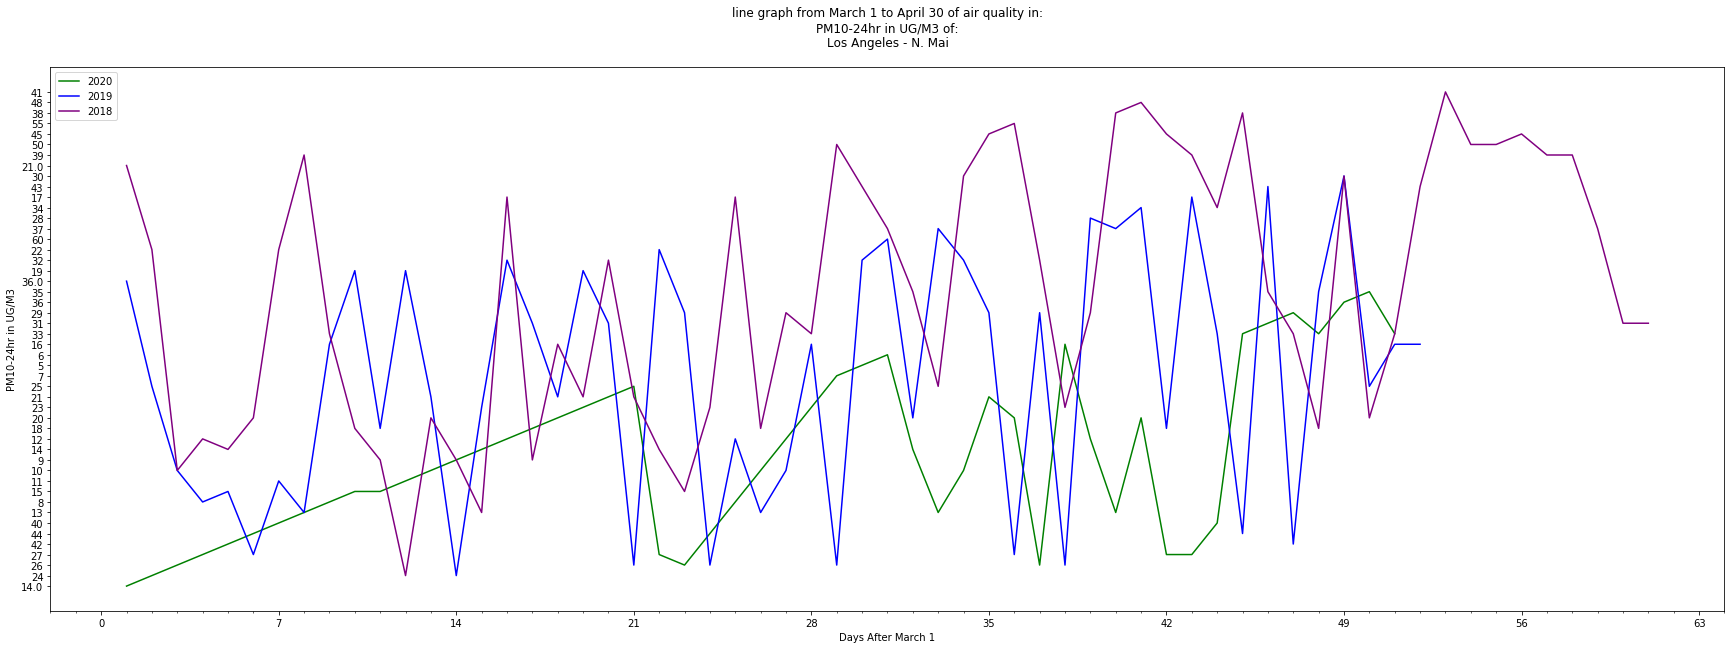

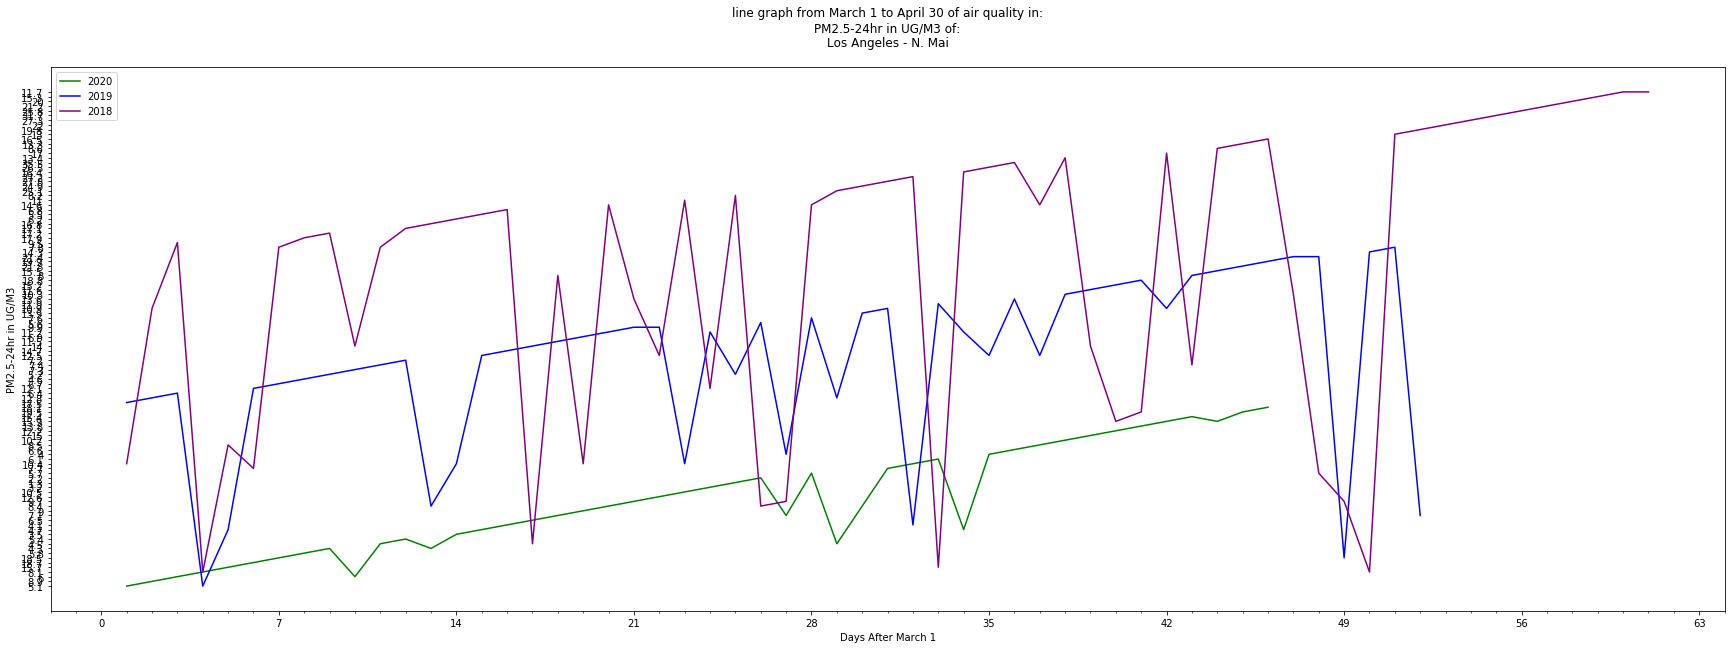

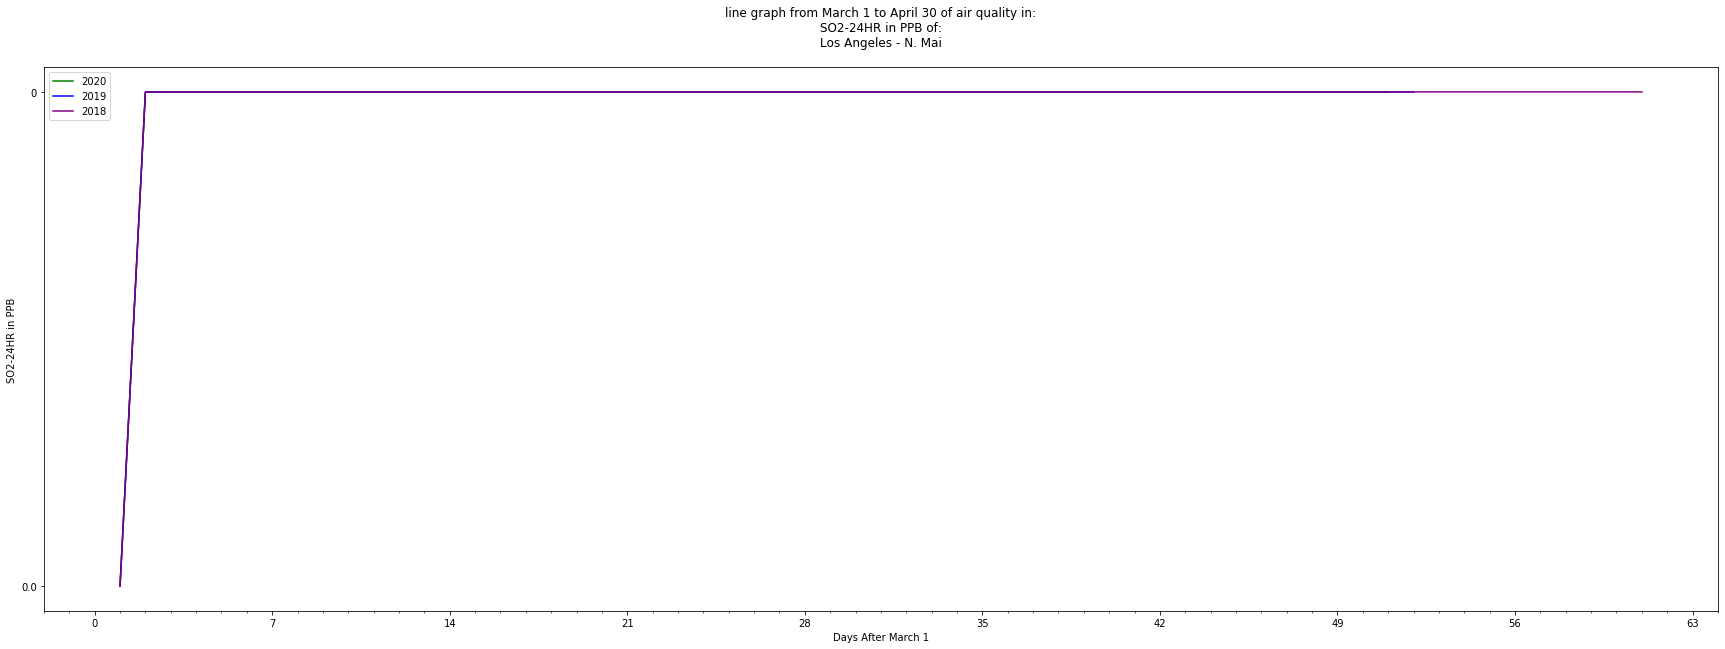

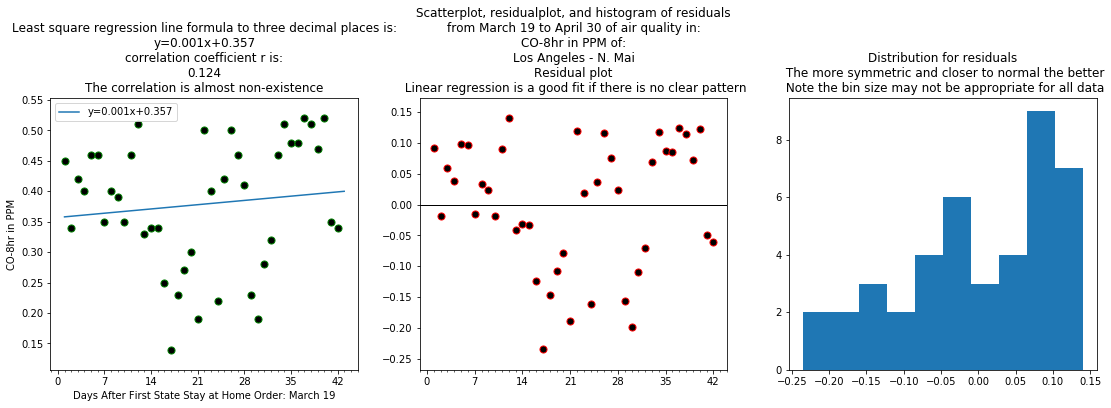

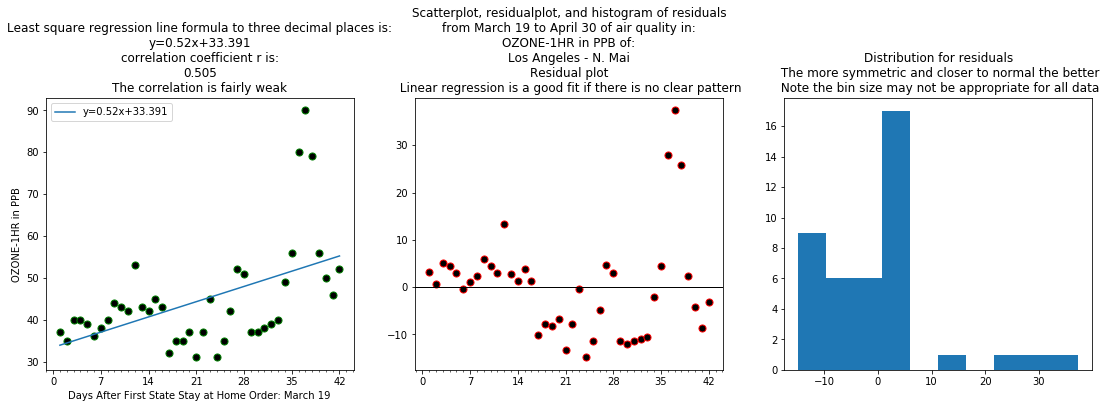

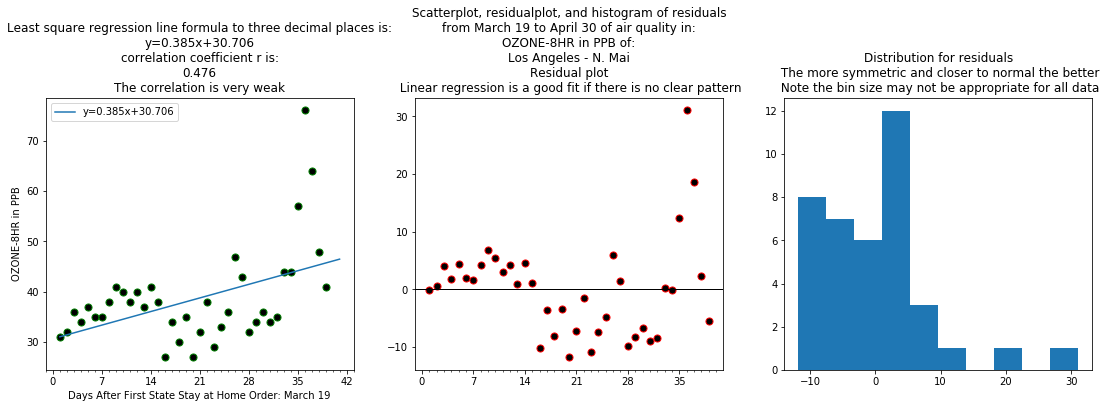

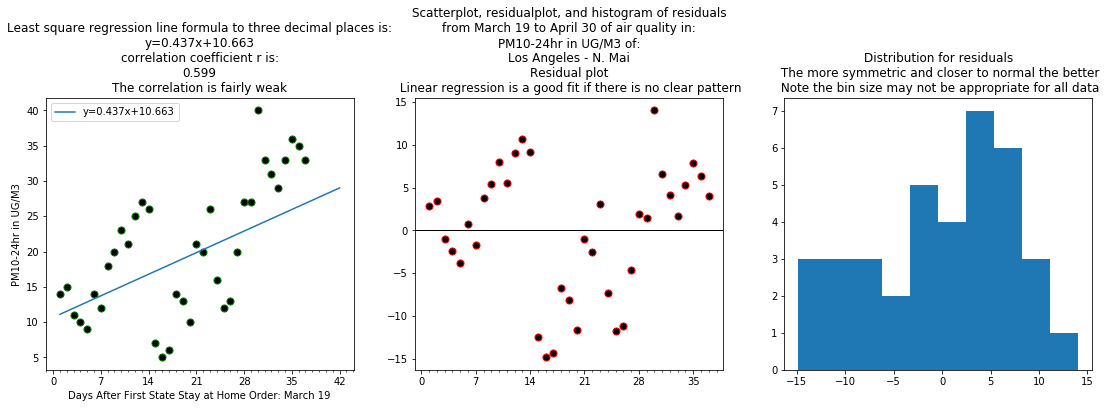

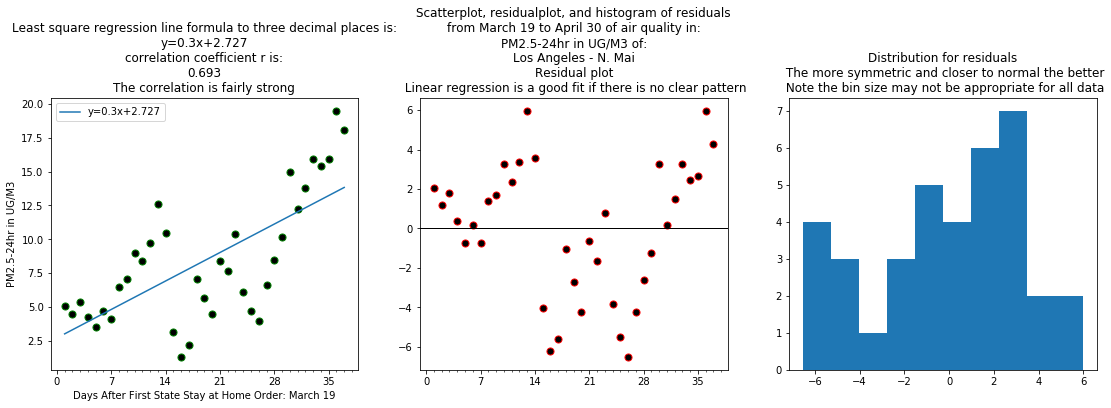

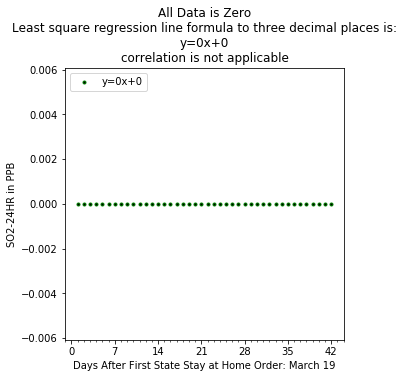

In [27]:
# all data files were downloaded from the airnow archive
# Import the libraries
import numpy as np
import random
import pprint
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import scipy.stats as stats


Major_city_list=[]
New_york=['Bronx - IS52','Bklyn - PS274','Queens','Manhattan/IS143','CCNY']
Los_angeles=['West Los Angeles - V','Los Angeles - N. Mai']
San_francisco=['San Francisco']
San_diego=['San Diego','San Diego - Kearny V','Otay Mesa - Donovan']
Denver=['I25 Denver','Denver - CAMP - 2105']
Santa_fe=['Santa Fe Airport']
Albuquerque=['Del Norte','Tramway']
Phoenix=['South Phoenix','North Phoenix','Central Phoenix','West Phoenix']
Chicago=['East Chicago Post Of','East Chicago - Marin']
Boston=['Boston - Roxbury','BOSTON-KENMORE']
Providence=['Providence','E Providence']
Major_city_list=Providence+Boston+Chicago+Phoenix+Albuquerque+Santa_fe+Denver+San_diego+San_francisco+Los_angeles
#Salt_lake couldn't find data

# a function that when the data path to the data file and the location/city are inputted in the parameter
# returns a dictionary with the units and types of measure as keys corresponding with their respective measurements
# as well as a list of the keys, the values, and the measure so later a loop can iterate through the dictionary and 
#conditionals can be met. The data from the start file is added. 
#Caution in order for the program to work as intended proceed from start date onwards
def create_dictionary(data_path, location):
    #initializing the list that holds the type of measure, ex Ozone 8hr this will be returned by the function
    measure=[]
    #initializing the list that holds the units for the measure, ex PPB
    unit=[]
    #initializing the list that holds the actual numerical numbers, ex 48 this will be returned by the function
    measurement=[]
    #initializing the local dictionary that is going to be returned by the function
    dictionary={}
    #initializing the list that will hold the dictionary keys that will be returned by the function
    legend=[]
    #open the data file from the data path parameter inputted in the function 
    with open(data_path, encoding='latin-1') as f:
        #iterating through each line in the data file splitting by the delimiter '|'
        for line in f:
            line = line.split('|')
            if (line[2]==str(location)):
                #add the respective data to the list that describes it
                measure.append(line[3])
                unit.append(line[4])
                measurement.append(line[5])
    #iterate through the length of the data
    for i in range (0,len(measure)):
        #make the keys for the dictionary out of the measure and the units, ex Ozone-8hr in PPB
        key=(str(measure[i])+' in '+str(unit[i]))
        #adding the keys to the legen list
        legend.append(key)
        val=measurement[i]
        #float is used since some dat is decimal
        dictionary[key]=[float(val)]
    return dictionary, legend, measurement, measure


#a function that takes the parameters of the dat file the location/city, the legend, the measure and the dictionary the data will be added to
#adds the data to the dictionary created above in the same list connected to the right keys
def add_data(data_path,location,dictionary):
    with open(data_path, encoding='latin-1') as f:
        #the flags for missing data if the flag is false 'no Data' will be appended to the list
        if 'CO-8hr in PPM' not in dictionary.keys():
            dictionary['CO-8hr in PPM'] = ['NoData']
        if 'OZONE-1HR in PPB' not in dictionary.keys():
            dictionary['OZONE-1HR in PPB'] = ['NoData']
        if 'OZONE-8HR in PPB' not in dictionary.keys():
            dictionary['OZONE-8HR in PPB'] = ['NoData']
        if 'PM10-24hr in UG/M3' not in dictionary.keys():
            dictionary['PM10-24hr in UG/M3'] = ['NoData']
        if 'PM2.5-24hr in UG/M3' not in dictionary.keys():
            dictionary['PM2.5-24hr in UG/M3'] = ['NoData'] 
        if 'SO2-24HR in PPB' not in dictionary.keys():
            dictionary['SO2-24HR in PPB'] = ['NoData']
        CO8hr=False
        OZONE1HR=False
        OZONE8HR=False
        PM1024hr=False
        PM2524hr=False
        SO224HR=False
        #itereating through the data file and splitting by the delimiter '|'
        for line in f:
            line = line.split('|')
            #making sure the right data was captured
            if (line[2]==str(location)):
                #making the flags true if the data is present and adding the data to the correct key
                if(line[3]=='CO-8hr'):
                    CO8hr=True
                    dictionary['CO-8hr in PPM'].append(line[5])
                elif(line[3]=='OZONE-1HR'):
                    OZONE1HR=True
                    dictionary['OZONE-1HR in PPB'].append(line[5])
                elif(line[3]=='OZONE-8HR'):
                    OZONE8HR=True
                    dictionary['OZONE-8HR in PPB'].append(line[5])
                elif(line[3]=='PM10-24hr'):
                    PM1024hr=True
                    dictionary['PM10-24hr in UG/M3'].append(line[5])
                elif(line[3]=='PM2.5-24hr'):
                    PM2524hr=True
                    dictionary['PM2.5-24hr in UG/M3'].append(line[5])
                elif(line[3]=='SO2-24HR'):
                    SO224HR=True
                    dictionary['SO2-24HR in PPB'].append(line[5])
         #if the flags are false add a placeholder to the data               
        if (CO8hr==False):
            dictionary['CO-8hr in PPM'].append('NoData')
        elif (OZONE1HR==False):
            dictionary['OZONE-1HR in PPB'].append('NoData')
        elif (OZONE8HR==False):
            dictionary['OZONE-8HR in PPB'].append('NoData')
        elif (PM1024hr==False):
            dictionary['PM10-24hr in UG/M3'].append('NoData')
        elif (PM2524hr==False):
            dictionary['PM2.5-24hr in UG/M3'].append('NoData')
        elif (SO224HR==False):
            dictionary['SO2-24HR in PPB'].append('NoData') 

            
#a function that removes the placeholder 'NoData' generates a xlist for plotting and removes 
#the corresponding indices as the placeholder
def check_missing_data(dictionary_key):
    #generate the xlist for plotting
    xlist=np.arange(1, (len(dictionary_key)+1), 1).tolist()
    #the ylist is the same as the dictionary data
    ylist=dictionary_key
    #initialize the local index list that stores the indexes of the 'NoData'
    index=[]
    for i in range (0,len(dictionary_key)):
        if (ylist[i]=='NoData'):
            #store the nodata indexes
            index.append(i)
    #remove the 'NoData' values and their corresponding x time value
    for i in sorted(index, reverse=True):
        del xlist[i]
        del ylist[i]
    #return the x and y list for plotting
    return xlist,ylist



#plot a line graph of the city over three years for a specific measure/key
def line_plotter(dictionary2020,dictionary2019,dictionary2018,dictionary_key,city,measure):
    fig, ax1=plt.subplots(nrows=1, ncols=1, figsize=(30,10))
    ax1.plot(check_missing_data(dictionary2020[dictionary_key])[0],check_missing_data(dictionary2020[dictionary_key])[1],c='green')
    ax1.plot(check_missing_data(dictionary2019[dictionary_key])[0],check_missing_data(dictionary2019[dictionary_key])[1],c='blue')
    ax1.plot(check_missing_data(dictionary2018[dictionary_key])[0],check_missing_data(dictionary2018[dictionary_key])[1],c='purple')
    ax1.set_xlabel('Days After March 1')
    ax1.set_ylabel(dictionary_key)
    ax1.legend(['2020','2019','2018'],loc='upper left')
    ax1.xaxis.set_major_locator(MultipleLocator(7))
    ax1.xaxis.set_minor_locator(MultipleLocator(1))
    ax1.set_title('line graph from March 1 to April 30 of air quality in:\n'+dictionary_key+' of:\n'+str(save_fig_check(city))+'\n')
    fig.savefig('line for '+ str(measure)+ ' for '+ str(save_fig_check(city))+'.png')

def save_fig_check(name):
    name = name.split('/')
    name = '-'.join(name)
    return name
#a function which handed a list of uni variate data finds the mean of that data
def mean(data):
    # makes sure that if there is no data in the list zero is returned instead of the mean
    if (len(data)!=0):
        sumOfData = 0.0
        for i in range(0,len(data)):
            sumOfData+=data[i]
        return sumOfData/(len(data))
    else:
        return 0
#a function which finds the standard deviation of data in a list inputted as the parameter data
def stDev (data):
    sumOfDifference = 0.0
    for i in range(0,len(data)):
        sumOfDifference+=((data[i]-mean(data))*(data[i]-mean(data)))
    return (math.sqrt(sumOfDifference/len(data)))

#a function that finds the corelation coefficient r for bivariate data inputted as two lists into 
# their respective parameters of explanatory and response
def correlation(explanatory,response):
    sumOfDifferences=0.0
    for i in range(0,len(explanatory)):
        if (len(explanatory)==len(response)):
            sumOfDifferences+=((explanatory[i]-mean(explanatory))*(response[i]-mean(response)))
    return (sumOfDifferences/(stDev(explanatory)*stDev(response)))/(len(explanatory))

#a function that finds the least squares regression line variables for bivariate data 
#inputed in the explanatory and response parameters of the function
def leastSquares(explanatory,response):
    r=round(correlation(explanatory,response),3)
    m=round(r*stDev(response)/stDev(explanatory),3)
    b=round(mean(response)-m*mean(explanatory),3)
    return m,b,r

#a function which takes a dictionary and a dictionary key then plots a scatter plot and least squares line
#of the data with respect to time, the residual plot of the scatterplot and a histogram of the residuals
#the function also accesses the correlation, prints the assessment, the equation of the line, and the 
#correlation coefficient r
def scatter_LSq_Resid_Hist(dictionary, dictionary_key,city,measure):
    #get rit of the missing data in the dictionary and replace the integer value with floating point values
    #this is done so that division through the list by a float is possible
    # set an x and ylist for the data
    x=[float(i) for i in check_missing_data(dictionary[dictionary_key])[0]]
    ylist=[float(i) for i in check_missing_data(dictionary[dictionary_key])[1]]
    #initialize a residual list
    resid=[]
    # make sure that there is at least some data in the dictionary if there is not mean will return 0
    if (mean(x)!=0 and mean(ylist)!=0):
        fig, (ax1,ax2,ax3)=plt.subplots(nrows=1, ncols=3, figsize=(18.75,5))
        #get the m,x, and r values for the least squares regression
        m,b,r=leastSquares(x,ylist)
        #access the correlation
        #note these values are by no means set and were only created according to my interpretation of strength
        if (abs(r)>0.75):
            corel='The correlation is strong'
        elif (abs(r)>0.60):
            corel='The correlation is fairly strong'
        elif (abs(r)>0.50):
            corel='The correlation is fairly weak'
        elif (abs(r)>0.40):
            corel='The correlation is very weak'
        elif (r!=0):
            corel='The correlation is almost non-existence'
        else:
            corel='There is no correlation'
        #initialize and compute the y values for the least squares regression line inorder to plot it
        y=[(i*m)+b for i in x]
        #add the residuals to the residual list actual-predicted where ylist is the actual values and y is the
        #predicted
        for i in range(0,len(ylist)):
            resid.append(ylist[i]-y[i])
        #plot the scatterplot and least square line
        ax1.scatter(x=check_missing_data(dictionary[dictionary_key])[0],y=check_missing_data(dictionary[dictionary_key])[1],s=200,marker='.',c='black',edgecolor='g')
        ax1.plot(x,y)
        ax1.legend([('y='+ str(m)+'x'+'+'+str(b))],loc='upper left')
        ax1.set_xlabel('Days After First State Stay at Home Order: March 19')
        ax1.set_ylabel(dictionary_key)
        ax1.xaxis.set_major_locator(MultipleLocator(7))
        ax1.xaxis.set_minor_locator(MultipleLocator(1))
        ax1.set_title('Least square regression line formula to three decimal places is:\n'+'y='+ \
        str(m)+'x'+'+'+str(b)+'\n'+'correlation coefficient r is:\n'+str(r)+'\n'+str(corel))
        #plot the residual plot
        ax2.scatter(x=check_missing_data(dictionary[dictionary_key])[0],y=resid,s=200,marker='.',c='black',edgecolor='r')
        ax2.xaxis.set_major_locator(MultipleLocator(7))
        ax2.xaxis.set_minor_locator(MultipleLocator(1))
        ax2.set_title('Scatterplot, residualplot, and histogram of residuals\nfrom March 19 to April 30 of air quality in:\n'+
                      dictionary_key+' of:\n'+city+'\nResidual plot\n Linear regression is a good fit if there is no clear pattern')
        ax2.axhline(linewidth=1, color='black')
        #plot histogram
        ax3.hist(resid, bins = 10)
        ax3.set_title('Distribution for residuals\n The more symmetric and closer to normal the better\n Note the bin size may not be appropriate for all data')
        #fig.suptitle('Scatterplot, residualplot, and histogram of residuals from March 19 to April 30 of air quality in:\n'+dictionary_key+' of:\n'+city+'\n')
        fig.savefig('scatter for '+ str(measure)+ ' for '+ str(save_fig_check(city))+'.png')
    else:
        fig, ax1=plt.subplots(nrows=1, ncols=1, figsize=(5,5))
        ax1.scatter(x=check_missing_data(dictionary[dictionary_key])[0],y=check_missing_data(dictionary[dictionary_key])[1],marker='.',c='black',edgecolor='g')
        ax1.legend(['y=0x+0'],loc='upper left')
        ax1.set_xlabel('Days After First State Stay at Home Order: March 19')
        ax1.set_ylabel(dictionary_key)
        ax1.xaxis.set_major_locator(MultipleLocator(7))
        ax1.xaxis.set_minor_locator(MultipleLocator(1))
        ax1.set_title('All Data is Zero\nLeast square regression line formula to three decimal places is:\ny=0x+0\ncorrelation is not applicable')

#a function which prints a list of locations from an airnow dat file
def location_list(data_path):
    with open(data_path, encoding='latin-1') as f:
        duplicate_list=[]
        location_list=[]
        for line in f:
            line = line.split('|')
            duplicate_list.append(line[2])
        for i in duplicate_list:
                if i not in location_list:
                    location_list.append(i)
    return location_list
def sample(dictionary1,dictionary2):
    x=0

#if scatter was chosen grab data from after march 19 and create and add that data to a dictionary
#March 19th was the first stay at home state order so I wanted to see by scatter and regression if airquality increased
# or air quality increased after CoVID shutdown so did people and businnesses restart driving etc 
#after an initial decrease
def scatter_line_figures(city,type_of_graph):
    if (type_of_graph=='scatter'):
        #create a city 2018 dictionary with respective measure,values and legend
        city_2018,city_legend_2018,city_values_2018,city_measure_2018=create_dictionary('/home/usr/airnowDat/2018/20180319-peak.dat',city)
        #Add the rest of the 2018 data to the city 2018 dictionary
        for i in range(20,32):
            add_data(('/home/usr/airnowDat/2018/201803'+str(i)+'-peak.dat'),city,city_2018)
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2018/2018040'+str(i)+'-peak.dat'),city,city_2018)
        for i in range(10,31):
            add_data(('/home/usr/airnowDat/2018/201804'+str(i)+'-peak.dat'),city,city_2018)

        #create a city 2019 dictionary with respective measure,values and legend
        city_2019,city_legend_2019,city_values_2019,city_measure_2019=create_dictionary('/home/usr/airnowDat/2019/20190319-peak.dat',city)
        #Add the rest of the 2019 data to the city 2019 dictionary
        for i in range(20,32):
            add_data(('/home/usr/airnowDat/2019/201903'+str(i)+'-peak.dat'),city,city_2019)
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2019/2019040'+str(i)+'-peak.dat'),city,city_2019)
        for i in range(10,31):
            add_data(('/home/usr/airnowDat/2019/201904'+str(i)+'-peak.dat'),city,city_2019)

        #create a city 2020 dictionary with respective measure,values and legend
        city_2020,city_legend_2020,city_values_2020,city_measure_2020=create_dictionary('/home/usr/airnowDat/2020/20200319-peak.dat',city)
        #Add the rest of the 2020 data to the city 2020 dictionary
        for i in range(20,32):
            add_data(('/home/usr/airnowDat/2020/202003'+str(i)+'-peak.dat'),city,city_2020)
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2020/2020040'+str(i)+'-peak.dat'),city,city_2020)
        for i in range(10,31):
            add_data(('/home/usr/airnowDat/2020/202004'+str(i)+'-peak.dat'),city,city_2020)
        #plot the data as a scatterplot, linear regression line, residual plot and histogram
        #for all measures in the legend of the dictionary
        for i in range (0,len(city_legend_2020)):
            scatter_LSq_Resid_Hist(city_2020,city_legend_2020[i],city,city_measure_2020[i])

    #If line was chosen graph data from March and April to see if airparticulates decreased sharply at any 
    #point due to COVID shutdown comparing to 2019 and 2018 as control        
    elif (type_of_graph=='line'):
        #create a city 2018 dictionary with respective measure,values and legend
        city_2018,city_legend_2018,city_values_2018,city_measure_2018=create_dictionary('/home/usr/airnowDat/2018/20180319-peak.dat',city)
        #Add the rest of the 2018 data to the city 2018 dictionary
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2018/2018030'+str(i)+'-peak.dat'),city,city_2018)
        for i in range(10,32):
            add_data(('/home/usr/airnowDat/2018/201803'+str(i)+'-peak.dat'),city,city_2018)
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2018/2018040'+str(i)+'-peak.dat'),city,city_2018)
        for i in range(10,31):
            add_data(('/home/usr/airnowDat/2018/201804'+str(i)+'-peak.dat'),city,city_2018)

        #create a city 2019 dictionary with respective measure,values and legend
        city_2019,city_legend_2019,city_values_2019,city_measure_2019=create_dictionary('/home/usr/airnowDat/2019/20190319-peak.dat',city)
        #Add the rest of the 2019 data to the city 2019 dictionary
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2019/2019030'+str(i)+'-peak.dat'),city,city_2019)
        for i in range(20,32):
            add_data(('/home/usr/airnowDat/2019/201903'+str(i)+'-peak.dat'),city,city_2019)
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2019/2019040'+str(i)+'-peak.dat'),city,city_2019)
        for i in range(10,31):
            add_data(('/home/usr/airnowDat/2019/201904'+str(i)+'-peak.dat'),city,city_2019)

        #create a city 2020 dictionary with respective measure,values and legend
        city_2020,city_legend_2020,city_values_2020,city_measure_2020=create_dictionary('/home/usr/airnowDat/2020/20200319-peak.dat',city)
        #Add the rest of the 2020 data to the city 2020 dictionary
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2020/2020030'+str(i)+'-peak.dat'),city,city_2020)
        for i in range(20,32):
            add_data(('/home/usr/airnowDat/2020/202003'+str(i)+'-peak.dat'),city,city_2020)
        for i in range(1,10):
            add_data(('/home/usr/airnowDat/2020/2020040'+str(i)+'-peak.dat'),city,city_2020)
        for i in range(10,31):
            add_data(('/home/usr/airnowDat/2020/202004'+str(i)+'-peak.dat'),city,city_2020)
        #plot the data as a line graph for all measures in the legend of the dictionary
        for i in range (0,len(city_legend_2020)):
            line_plotter(city_2020,city_2019,city_2018,city_legend_2020[i],city,city_measure_2020[i])
#New_york
#Providence
#Boston
#Chicago
#Phoenix
#Albuquerque
#Santa_fe
#Denver
#San_diego
#San_francisco
#Los_angeles
for i in Los_angeles:
    scatter_line_figures(i,'line')
    scatter_line_figures(i,'scatter')